<a href="https://colab.research.google.com/github/Amineelhaddioui/EEG_brain_signals_emotion/blob/main/eeg_brain_signals_emotion_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **importation des bibliothèques** utilisées il a été supprimé la partie de l'importation from sklearn.metrics import plot_confusion_matrix car il n'existe plus dans les dernière version de sklearn.metrics

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns



**dataset importation and use**
This is a dataset of EEG brainwave data that has been processed with original strategy of statistical extraction
    the data set consist brain signal of one male and one feamle by showing them different scenes (like Emotional,Funny,Death,Nature scenes)
    and took their brain signal in these particular environments

In [ ]:
data = pd.read_csv("emotions.csv")

In [ ]:
#chceking length of dataset
len(data)

2132

### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham
### **Séparation des valeurs positives, négatives et neutre**.
### - data.loc[data["label"]=="POSITIVE"] permet de recuperer les elements avec un labelle POSITIVE  
### -pos.loc[2, 'fft_0_b':'fft_749_b'] permet de recuperer les valeurs allant de 'fft_0_b':'fft_749_b' et les assignes dans la variables sample_pos
### visualisation de l'en-tête du dataset

In [ ]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

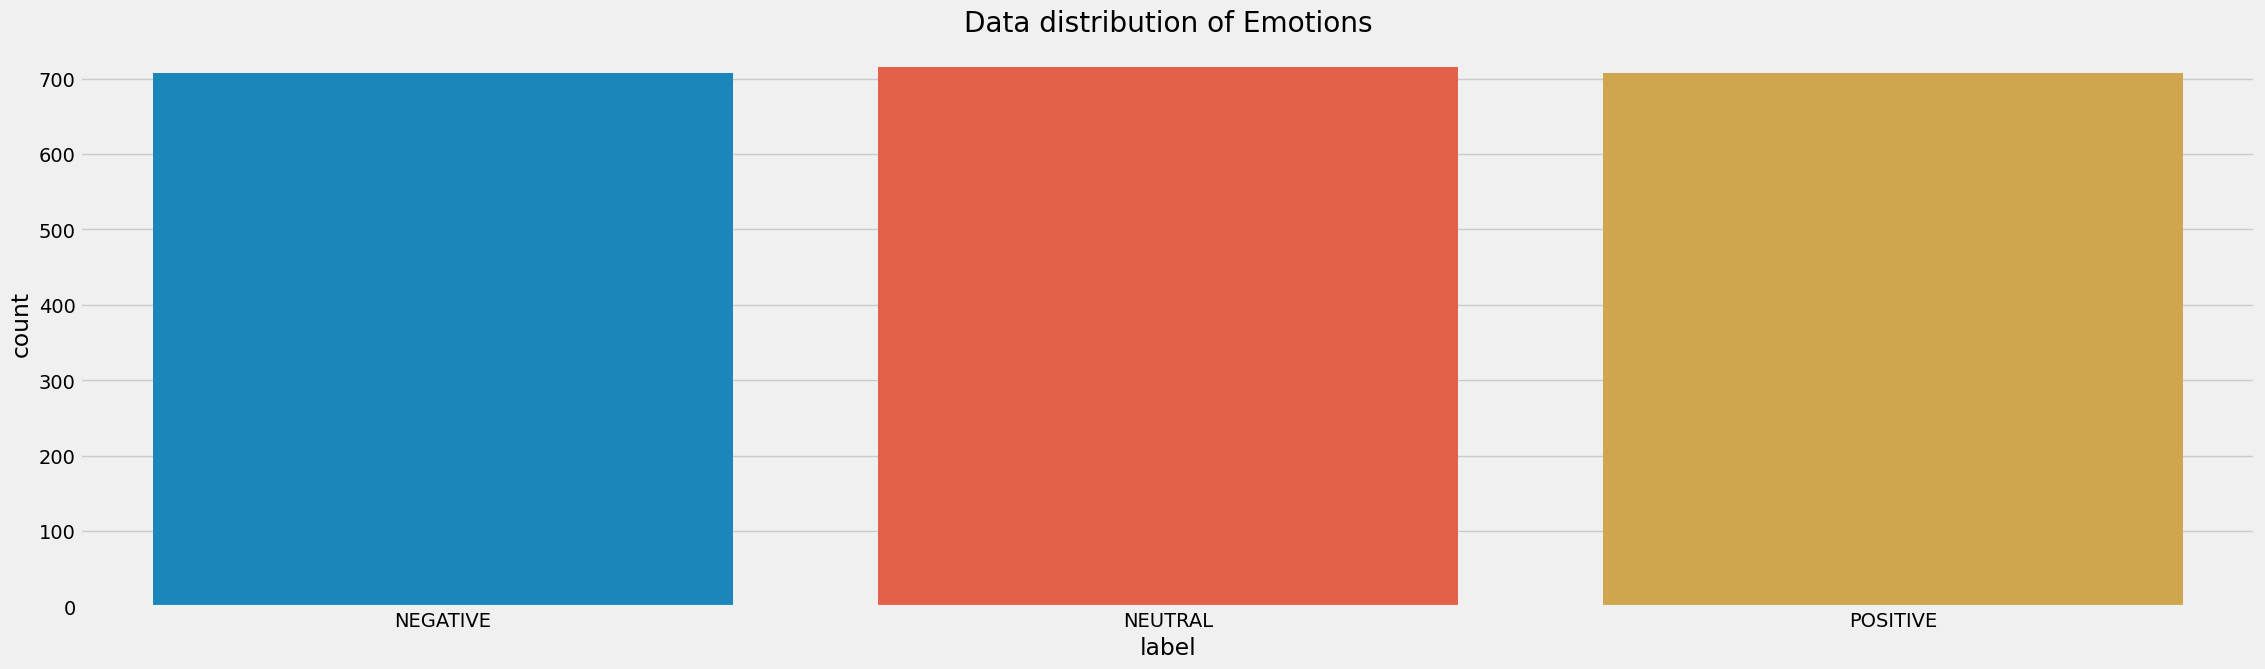

In [ ]:
#plotting Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham

### affichage de la courbe de chaque labelle (positives, negatives, neutre) sur la base des données récuperer précedemment à savoir sample_neg, sample_pos et sample_neu

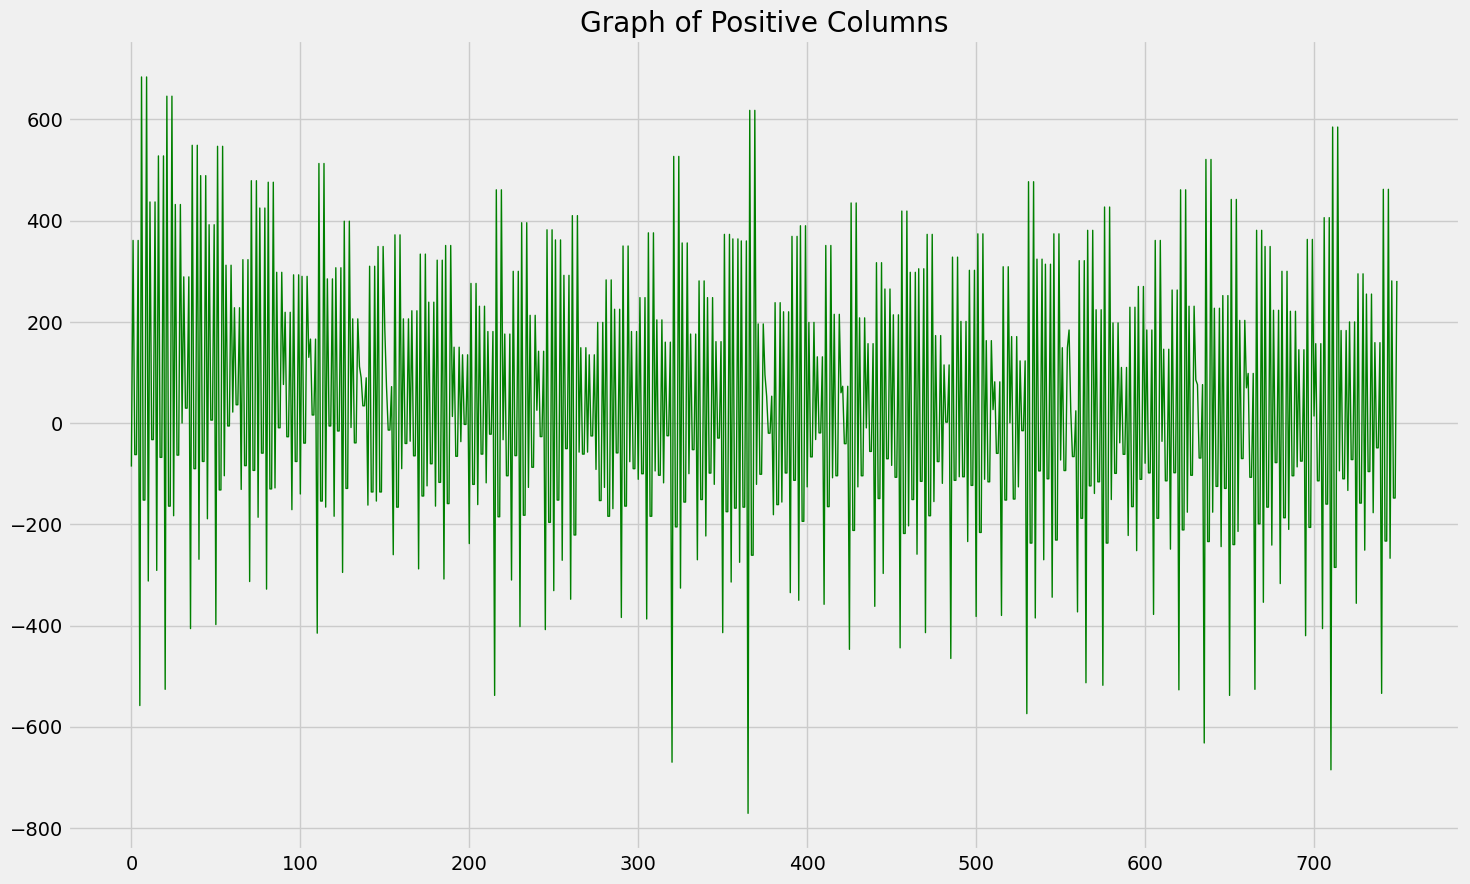

'As we can noticed the most of the positive Signals are from greater than 600 to and less than than -600'

In [ ]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos, color='green', linewidth=1)
plt.title("Graph of Positive Columns")
plt.show()
'''As we can noticed the most of the positive Signals are from greater than 600 to and less than than -600'''

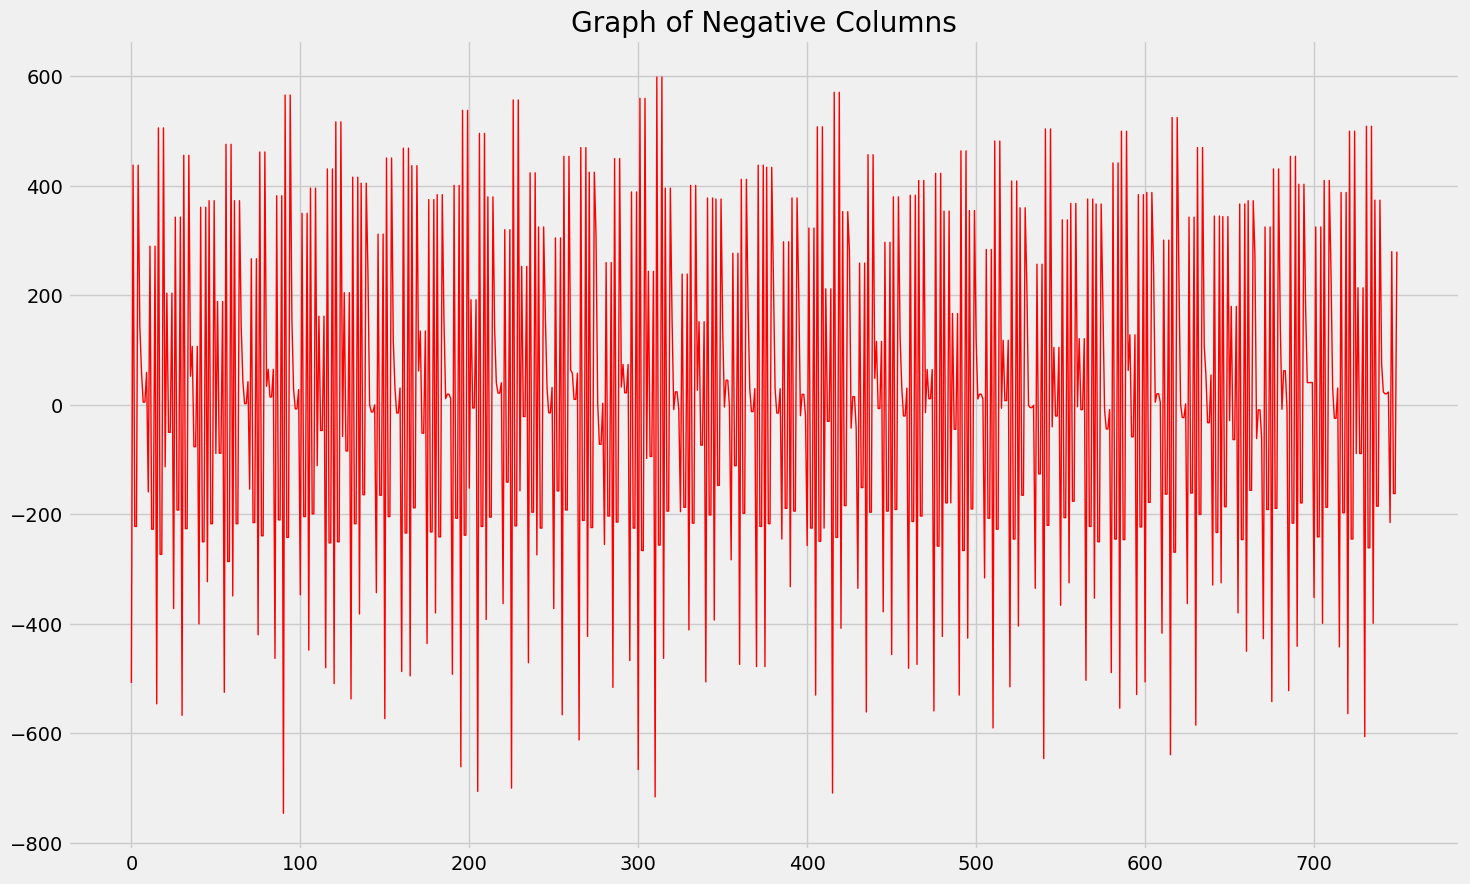

'As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'

In [ ]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg, color='red', linewidth=1)
plt.title("Graph of Negative Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'''

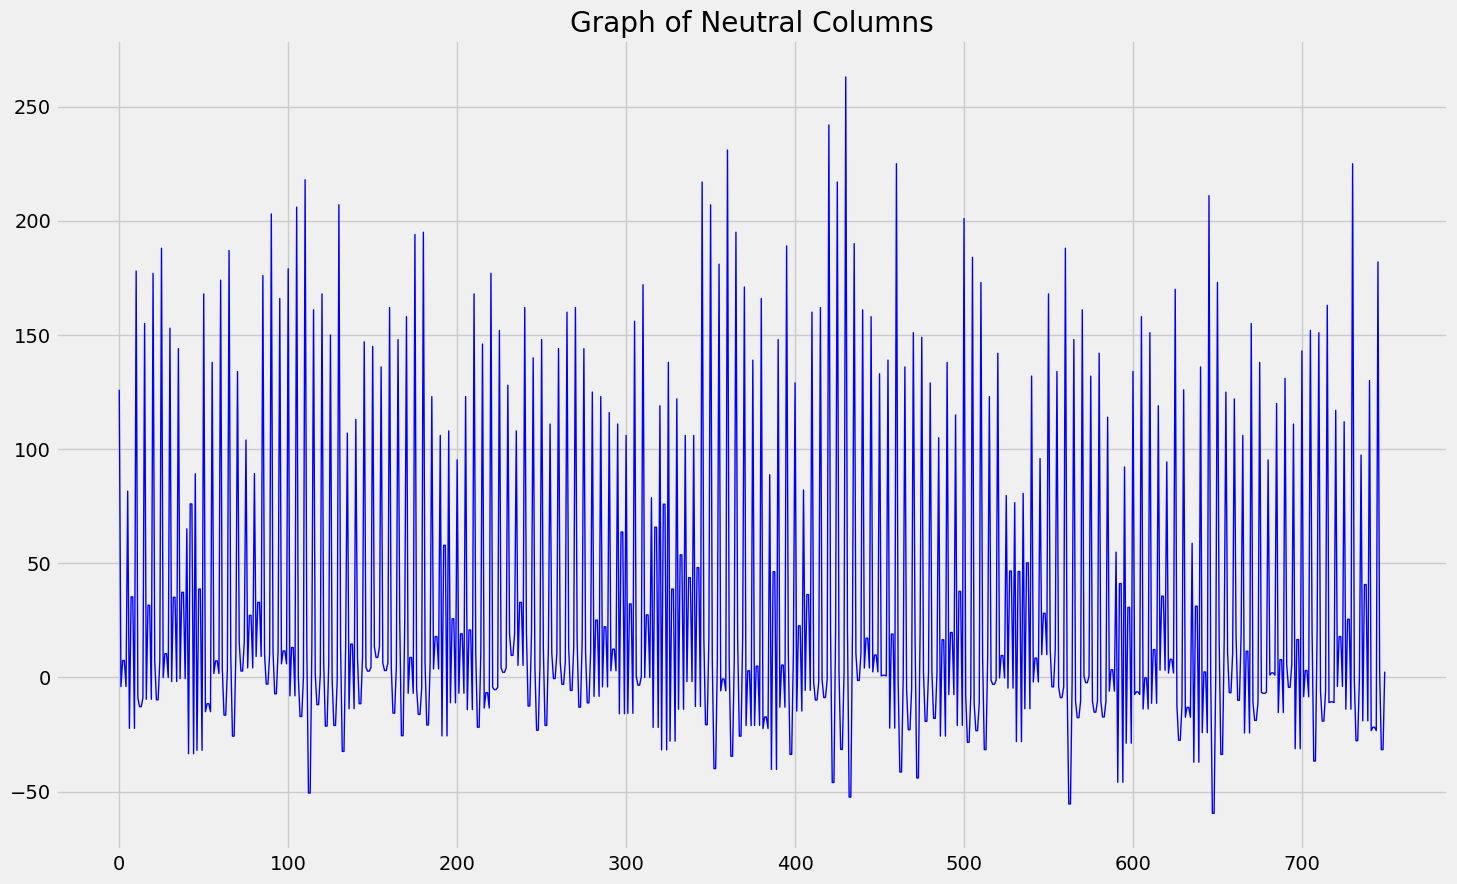

'As we can see the most of the Neutral Signals ae in between -50 to 250 '

In [ ]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu, color='blue', linewidth=1)
plt.title("Graph of Neutral Columns")
plt.show()
'''As we can see the most of the Neutral Signals ae in between -50 to 250 '''

### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham
### Transforme les données en un format plus approprié afin de les rendre plus adaptées pour l'entrainement du modele
#### - Encodage des labeles dans des valeurs numériques
#### - Assignation des signaux cerebraux à x
#### - Normalisation des données au travers de la fonction StandardScaler
#### - Conversion des etiquettes en vecteurs binaires à l'aide de la fonction to_categorical

In [ ]:
def Transform_data(data):
    #Encoding Labeles into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels
    Y = to_categorical(y)
    return X,Y

In [ ]:
#Calling above function and splitting dataset into train and test
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [ ]:
#checking shape of dataset
x_train.shape[1]

2548

### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham
### Création de la fonction create_model(). Elle permet de créer un modèle d'apprentissage automatique en utilisant le réseau neuronal récurrent LSTM

##### Les LSTM pour Long Short-Term Memory sont un type spécifique de réseau de neuronnes récurrents(RNN) qui ont été développés pour résoudre le problème du gradient (ce problème fait reference à la difficulté de propager le gradient ou l'erreur à travers les couches du réseau de neuronnes) qui disparait ou éxplose lors de l'entrainement des RNNs traditionnels.
##### Les LSTM ont été spécifiquement conçus pour atténuer le problème du gradient en introduisant des mécanismes de porte et des cellules mémoire pour gérer et contrôler l'information sur de longues séquences temporelles. Grâce à ces mécanismes, les LSTM peuvent maintenir des gradients stables et permettre une meilleure propagation de l'erreur à travers le temps, ce qui facilite l'apprentissage de relations à long terme dans les séquences

 ##### Le choix entre GRU, LSTM et DNN dépend de la nature du problème que vous essayez de résoudre et des caractéristiques des données. Par exemple, si vous travaillez sur des séquences très longues ou si vous avez besoin de conserver des informations à long terme, les LSTM peuvent être plus adaptés. Si vous travaillez sur des données tabulaires ou des problèmes de classification simples, un réseau de neurones entièrement connecté (DNN) peut être suffisant
##### Les GRU sont généralement plus légères en termes de calcul par rapport aux LSTM. Cela peut être avantageux si vous avez un ensemble de données volumineux ou si vous souhaitez entraîner un modèle plus rapidement.
##### Les GRU sont conçus pour remédier au problème du gradient qui disparaît dans les RNN.
 ##### en bref Le choix d'utiliser une couche GRU (Gated Recurrent Unit) au lieu d'une couche LSTM (Long Short-Term Memory) ou d'un réseau de neurones entièrement connecté (DNN) dépend du problème spécifique et des caractéristiques des données.

In [ ]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [ ]:
#creataing model
lstmmodel = create_model()
#Compiling model
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
48/48 [==============================] - 282s 6s/step - loss: 0.5590 - accuracy: 0.8462 - val_loss: 0.4525 - val_accuracy: 0.9006
Epoch 2/10
48/48 [==============================] - 279s 6s/step - loss: 0.1832 - accuracy: 0.9407 - val_loss: 0.1129 - val_accuracy: 0.9532
Epoch 3/10
48/48 [==============================] - 276s 6s/step - loss: 0.1109 - accuracy: 0.9609 - val_loss: 0.1358 - val_accuracy: 0.9357
Epoch 4/10
48/48 [==============================] - 280s 6s/step - loss: 0.1309 - accuracy: 0.9563 - val_loss: 0.1558 - val_accuracy: 0.9591
Epoch 5/10
48/48 [==============================] - 269s 6s/step - loss: 0.0515 - accuracy: 0.9863 - val_loss: 0.0990 - val_accuracy: 0.9532
Epoch 6/10
48/48 [==============================] - 269s 6s/step - loss: 0.0470 - accuracy: 0.9870 - val_loss: 0.1607 - val_accuracy: 0.9591
Epoch 7/10
48/48 [==============================] - 269s 6s/step - loss: 0.0575 - accuracy: 0.9804 - val_loss: 0.1659 - val_accuracy: 0.9357
Epoch 8/10
48

In [ ]:
#Loss and Accuracy of model on Testiong Dataset
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 20.482392609119415 
Accuracy on Training: 94.61358189582825


In [ ]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

14/14 [==============================] - 24s 2s/step


### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham
cette fonction permet la création d'une matrice de confusion ; cette matrice permet d'obtenir des information detaillées sur les performances d'un modèle de classification en mettant l'accent les valeures correctements classifiées et mal classifiées

In [ ]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [ ]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [ ]:
#printing first 10 Actual and predicted outputs of Test brain signals
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])


Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


Confusion matrix, without normalization
[[149   4   0]
 [  2 126  14]
 [  0   3 129]]


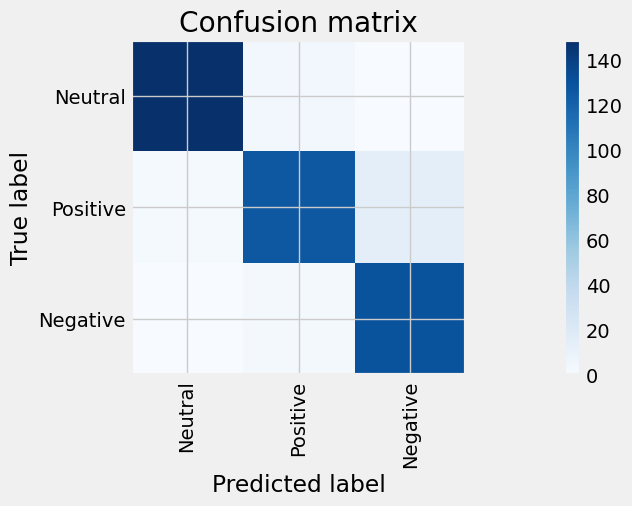

In [ ]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

In [ ]:
names1 = ["Neutral","Positive","Negative"]

### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham
#### Dans cette partie différent algorithme de machine learning de classification ont été utilisée pour construire différent model notemment Naïve Bayes, Support Vector Machine, la régression logistique, l'arbre de décision et l'algorithme de random forest
#### classification_report permet de fournir des mesures de performance détaillées pour chaque classe prédite par le modèle:
##### Precision (précision) : Pour chaque classe, il indique la proportion d'instances prédites comme positives qui sont réellement positives
##### Recall (rappel) : indique la proportion d'instances réellement positives qui ont été correctement prédites par le modèle. Un rappel élevé indique que le modèle a une capacité élevée à détecter les instances positives réelles
##### F1-score : C'est une mesure combinée de la précision et du rappel, calculée comme la moyenne pondérée harmonique entre les deux. Il fournit une mesure globale de la performance du modèle pour une classe donnée. Un F1-score élevé indique un bon équilibre entre la précision et le rappel.

##### Support : Il s'agit du nombre d'instances réelles de chaque classe dans l'ensemble de données.

In [ ]:
#Training our dataset on different Classifiers to check the results and creating their classification reports
#NAives Bayes Classifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)

#-----------------------------------------------------------------------------------------------------------------------------
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)

#-----------------------------------------------------------------------------------------------------------------------------
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)

#-----------------------------------------------------------------------------------------------------------------------------
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)

#-----------------------------------------------------------------------------------------------------------------------------
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)




*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.93 

### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham
##### Etant donner que la fonction plot_confusion_matrix n'existe plus dans la bibliothèque sklearn.metrics le code a été modifier de sorte à permettre l'affichage de la matrice de confusion  à l'aide confusion_matrix

[[149   4   0]
 [ 80  42  20]
 [  0  45  87]]
GaussianNB()


[[151   2   0]
 [  7 127   8]
 [  1   0 131]]
SVC(kernel='linear')


[[152   1   0]
 [  4 132   6]
 [  0   1 131]]
LogisticRegression(C=75, solver='liblinear')


[[151   2   0]
 [  0 137   5]
 [  0   1 131]]
RandomForestClassifier(n_estimators=50, random_state=0)




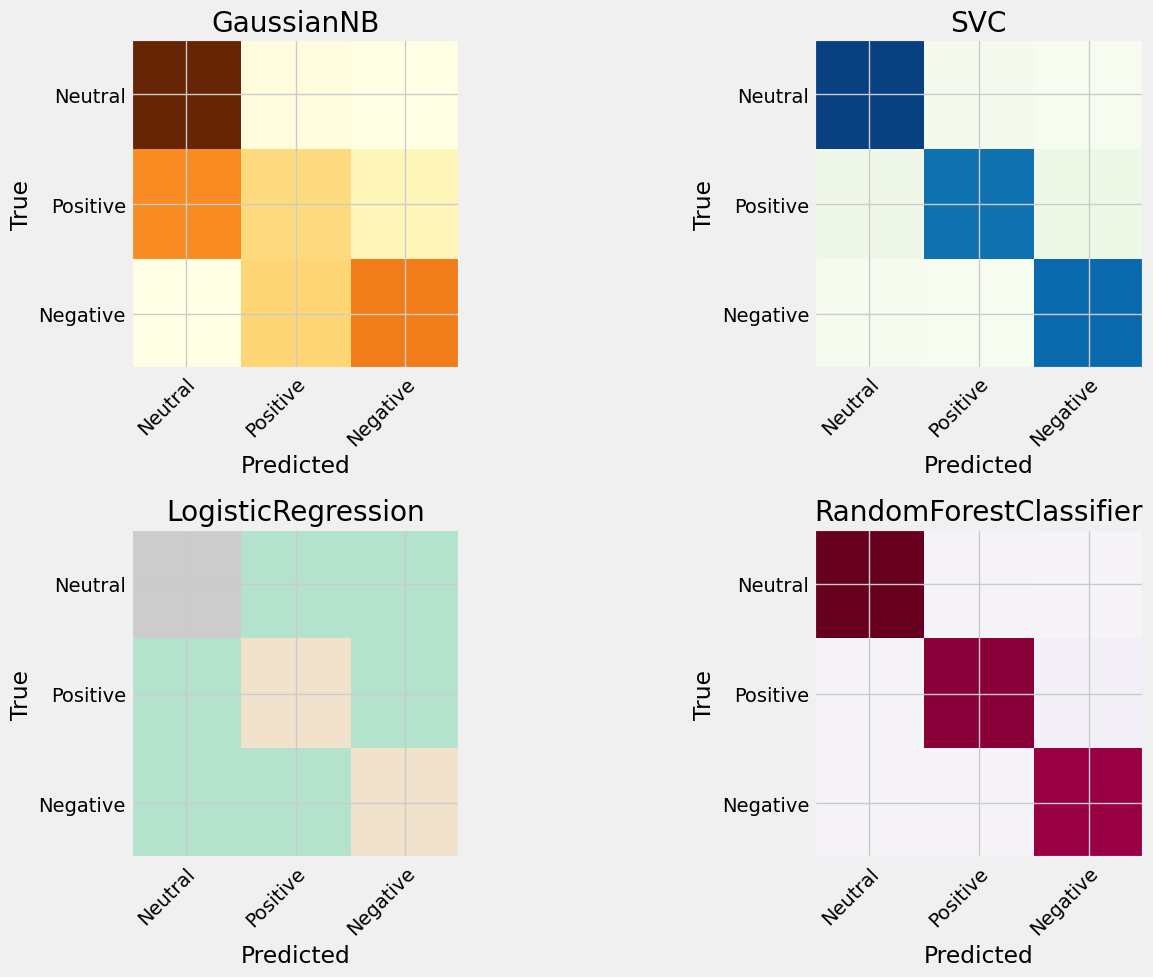

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]
from sklearn.metrics import confusion_matrix

for cls in classifiers:
    cls.fit(x_train, np.argmax(y_train, axis=1))

colors = ['YlOrBr', 'GnBu', 'Pastel2', 'PuRd']

for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    y_pred = cls.predict(x_test)
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    ax.imshow(cm, interpolation='nearest', cmap=c)
    ax.set_title(type(cls).__name__)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticks(np.arange(len(names1)))
    ax.set_yticks(np.arange(len(names1)))
    ax.set_xticklabels(names1)
    ax.set_yticklabels(names1)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    print(cm)
    print(cls)
    print("\n")

plt.tight_layout()
plt.show()


In [ ]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

14/14 [==============================] - 23s 2s/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.95      0.89      0.92       142
           2       0.90      0.98      0.94       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.94       427
weighted avg       0.95      0.95      0.95       427



### EEG DATA ANALYSIS From the 07th May 2023 to 19th May 2023 group 5 :
#### -Dieng Ibrahima Souba
#### -El Haddioui Amine
#### -Mohamed Aicham
#### Cette parte du code permet l'affichage de l'accuracy (précision) et de la perte  pour un modèle LSTM lors de l'entrainement

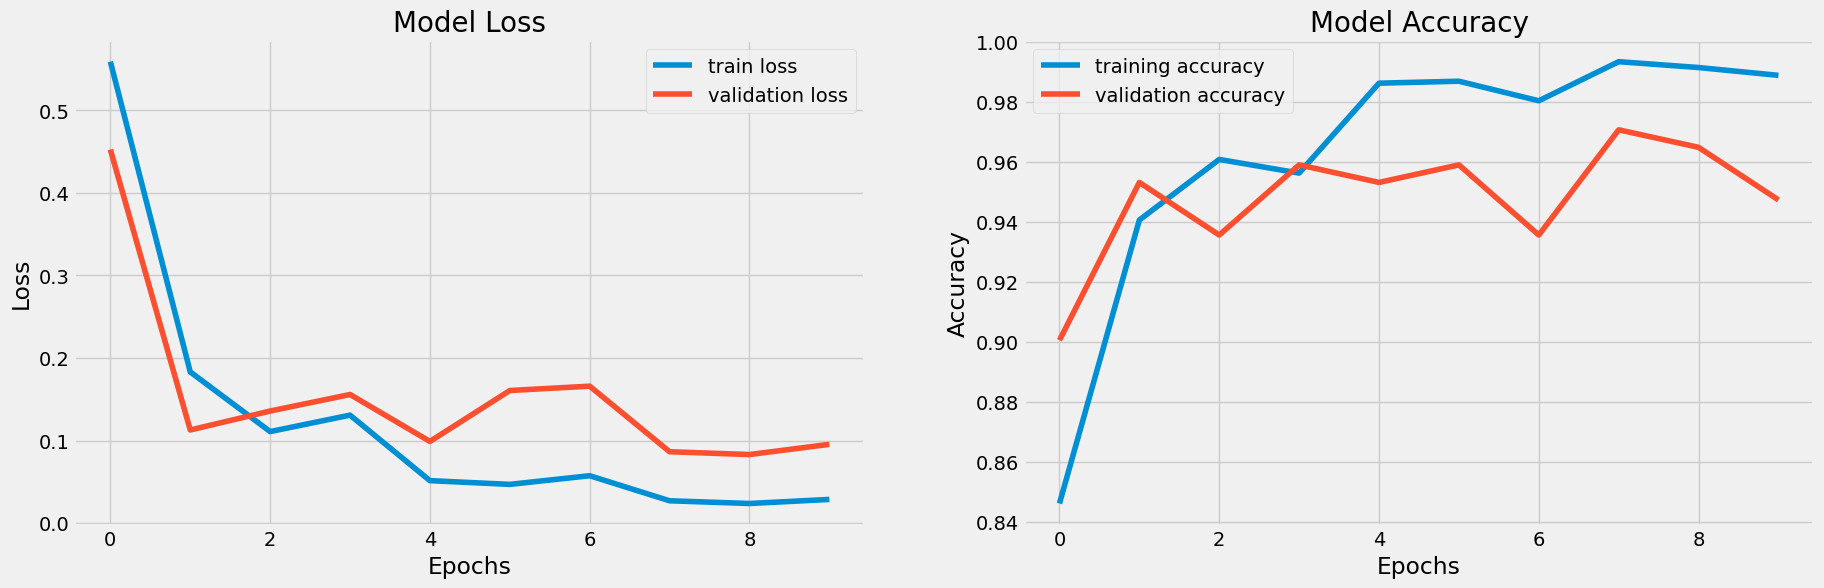

In [ ]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()